In [1]:
from tensorflow.random import set_seed
from matplotlib import pyplot as plt
import numpy as np
import os
os.chdir('../')

np.random.seed(42)
set_seed(42)

2023-06-05 23:26:46.643426: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-05 23:26:46.656344: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 23:26:46.765160: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 23:26:46.766128: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 23:26:47.470688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

## 1.- Carga de datos
se preprocesan y se cargan automáticamente

In [2]:
from src.utils import load_data
import numpy as np

img_data, label_data = load_data()
images = np.array(img_data)
images = images/255
labels = np.array(label_data)

Loading ../InsulatorsDataSet/03 Extraction/ images...
Loading ../InsulatorsDataSet/04 Extraction/ images...
Loading ../InsulatorsDataSet/05 Extraction/ images...
Loading ../InsulatorsDataSet/06 Extraction/ images...
Loading ../InsulatorsDataSet/07 Extraction/ images...
Loading ../InsulatorsDataSet/08 Extraction/ images...


In [3]:
def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)

idx = shuffle_along_axis(np.arange(600), 0)

### 1.1.- Conjuntos de datos

In [4]:
N_VALIDATION = 108
N_TRAIN = 432
N_TEST = 60

X_train = images[idx[:N_TRAIN]]
y_train = labels[idx[:N_TRAIN]]

X_val = images[idx[N_TRAIN:N_TRAIN+N_VALIDATION]]
y_val = labels[idx[N_TRAIN:N_TRAIN+N_VALIDATION]]

X_test = images[idx[N_TRAIN+N_VALIDATION:]]
y_test = labels[idx[N_TRAIN+N_VALIDATION:]]


## 2.- Construyendo modelo

In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
classifier = Sequential()
classifier.add(Dense(units = 25, activation = "softsign", input_shape = (634014,)))
classifier.add(Dense(units = 6, activation = 'softmax'))
classifier.compile(optimizer = 'nadam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

2023-06-05 23:10:13.470030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-05 23:10:13.470468: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### 2.1.- Entrenando modelo

In [6]:
history = classifier.fit(x=X_train, y=y_train, epochs=100, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100
14/14 [==============================] - 3s 164ms/step - loss: 2.1682 - accuracy: 0.2616 - val_loss: 1.5007 - val_accuracy: 0.3796
Epoch 2/100
14/14 [==============================] - 2s 135ms/step - loss: 1.2376 - accuracy: 0.5046 - val_loss: 1.1968 - val_accuracy: 0.5556
Epoch 3/100
14/14 [==============================] - 2s 151ms/step - loss: 0.9284 - accuracy: 0.6806 - val_loss: 1.0353 - val_accuracy: 0.6574
Epoch 4/100
14/14 [==============================] - 2s 134ms/step - loss: 0.7492 - accuracy: 0.7731 - val_loss: 0.9314 - val_accuracy: 0.7222
Epoch 5/100
14/14 [==============================] - 2s 139ms/step - loss: 0.6588 - accuracy: 0.8472 - val_loss: 0.9830 - val_accuracy: 0.6667
Epoch 6/100
14/14 [==============================] - 2s 135ms/step - loss: 0.6216 - accuracy: 0.8472 - val_loss: 0.9143 - val_accuracy: 0.6944
Epoch 7/100
14/14 [==============================] - 2s 133ms/step - loss: 0.5278 - accuracy: 0.8750 - val_loss: 0.7420 - val_accuracy: 0.7593

Epoch 58/100
14/14 [==============================] - 2s 156ms/step - loss: 0.0496 - accuracy: 0.9954 - val_loss: 0.4449 - val_accuracy: 0.8333
Epoch 59/100
14/14 [==============================] - 2s 133ms/step - loss: 0.0433 - accuracy: 0.9954 - val_loss: 0.5059 - val_accuracy: 0.8426
Epoch 60/100
14/14 [==============================] - 2s 135ms/step - loss: 0.0394 - accuracy: 0.9954 - val_loss: 0.4968 - val_accuracy: 0.8426
Epoch 61/100
14/14 [==============================] - 2s 131ms/step - loss: 0.0372 - accuracy: 0.9954 - val_loss: 0.4845 - val_accuracy: 0.8333
Epoch 62/100
14/14 [==============================] - 2s 134ms/step - loss: 0.0347 - accuracy: 0.9954 - val_loss: 0.4669 - val_accuracy: 0.8241
Epoch 63/100
14/14 [==============================] - 2s 137ms/step - loss: 0.0368 - accuracy: 0.9907 - val_loss: 0.4472 - val_accuracy: 0.8426
Epoch 64/100
14/14 [==============================] - 2s 148ms/step - loss: 0.0356 - accuracy: 0.9907 - val_loss: 0.4474 - val_accuracy:

### 2.2.- Visualizando resultados

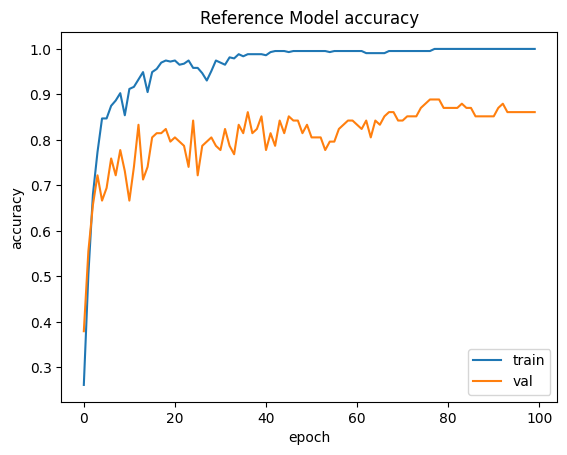

In [7]:
history = classifier.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Reference Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('reference_model_100ep_acc.png')
plt.show()

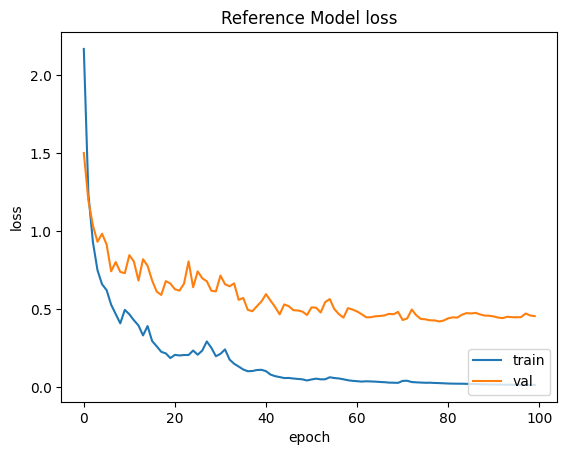

In [8]:
from matplotlib import pyplot as plt
history = classifier.history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Reference Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.savefig('reference_model_100ep_loss.png')
plt.show()

### 2.3.- Evaluando con conjunto de test

In [12]:
classifier.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3427 - accuracy: 0.9333


[0.34268155694007874, 0.9333333373069763]